# 데이터 정제 및 시각화

In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
import collections
import datetime

In [2]:
df = pd.read_excel('data_p/거제핫플.xlsx')
df.tail()

,날짜,해시태그
5069,2021-10-13,[]
5070,2021-10-13,"['#모닥불', '#거제핫플', '#거제맛집', '#거제도맛집', '#거제도여행',..."
5071,2021-10-13,"['#고디칼국수', '#통영맛집', '#통영여행', '#거제맛집', '#거제도핫플'..."
5072,2021-10-13,"['#바람의언덕간단한', '#경남여행', '#거제여행', '#바람의언덕', '#거제..."
5073,2021-10-13,"['#호텔상상', '#거제도숙소.....', '#거제도풀빌라', '#거제도호텔', ..."


In [3]:
# 해시태그 없는것 삭제 
df = df[df['해시태그']!='[]']
df = df.reset_index(drop=True)
df

,날짜,해시태그
0,2021-10-20,"['#비바포르짜거제에도', '#거제도여행', '#거제맛집', '#거제도맛집', '#..."
1,2021-10-25,"['#거제여행', '#거제가볼만한곳', '#거제맛집', '#거제핫플', '#거제도여..."
2,2021-10-19,"['#비바포르짜거제에도', '#거제도여행', '#거제맛집', '#거제도맛집', '#..."
3,2021-10-26,"['#장사도팡팡', '#거제여행', '#거제가볼만한곳', '#거제도여행', '#거제..."
4,2021-10-26,"['#바다가득한거제조개구이나들이박스', '#거제핫플', '#거제데이트코스', '#거..."
...,...,...
4416,2021-10-13,"['#거제정일면.', '#거제장평맛집', '#거제수양동', '#거제1박2일', '#..."
4417,2021-10-13,"['#모닥불', '#거제핫플', '#거제맛집', '#거제도맛집', '#거제도여행',..."
4418,2021-10-13,"['#고디칼국수', '#통영맛집', '#통영여행', '#거제맛집', '#거제도핫플'..."
4419,2021-10-13,"['#바람의언덕간단한', '#경남여행', '#거제여행', '#바람의언덕', '#거제..."


## 해시태그 키워드 정제 후 Top10 추출

In [7]:
# '#' 제거
df['해시태그'] = df['해시태그'].str.replace('#','')

In [9]:
# 똑같은 해시태그로 반복 되는것은 광고글일 가능성이 높기때문에 분석의 정확도를 위해 제거
b = []
for k,v in collections.Counter(df['해시태그']).items():
    if v == 1  :
        b.append(k)
        print(k,':',v)

['솔트마소마레', '솔트크림라떼마소마레'] : 1
['거제11주년카페', '와현카페', '이태리3대커피', '일리커피', '일리원두커피', '거제커피맛집', '와현커피맛집', '거제핫플', '거제가볼만한곳', '거제애견동반카패', '거제애견데크', '거제애견동반', '거제브런치카패'] : 1
['거제여행', '고성여행', '여행에미치다', '거제바다그리고펜션', '바다그리고펜션', '풀빌라펜션', '거제펜션', '거제핫플주말에'] : 1
['두리원', '한우맛집', '한우맛집추천', '명품한우', '소고기맛집', '한우세트', '한우선물세트', '거제맛집', '거제맛집추천', '거제핫플', '거제가볼만한곳', '거제도맛집', '거제고깃집', '거제도고깃집'] : 1
['인셀덤', '보타랩'] : 1
['캠핑장추천', '상처', '정직하게', '강정보', '포징연습', '직장인투잡', '눈썹문신', '부안맛집', '애플', '유머', '걱정', '개명', '트레드밀', '와일드캠핑', '가톨릭', '와규', '성장기록', '감동', '급찐급빠', '거제핫플', '영덕', '런온', '부케', '김제', '가을신상', '술집추천'] : 1
['거제빵집', '거제핫플', '거제데이트', '거제소노캄맛집', '거제카페', '소통소통'] : 1
['양세찬', '주식상담', '마크라메', '쿠팡이츠', '창원맘', '웨딩이벤트', '우정사진', '직장인점심', '챙겨주는', '게임', '슬립', '울산데이트', '청주카페', '덕질중', '호주맘', '산행', '거제핫플', '화산', '알콩달콩', '조정석', '화양연화', '늙어가는중', '풀업', '창원맛집', '백내장', '이마'] : 1
['미소식', '거제핫플', '풍경스타그램', '일상', '멋스타그램', '사진스타그램', '포토', '먹스타그램', '핫플', '여행스타그램', '사진', '여행사진', '힐링', '럽스타그램', '감성그램', '떡볶이', '포토그래

['근포동굴', '근포땅굴', '그림자샷', '핫플레이스', '인생샷', '액자샷', '거제도여행', '거제핫플', '일제강점기', '땅굴샷', '남해', '통영', '여행스타그램', '웨이팅필수'] : 1
['포도커플_거제', '와현해수욕장', '거제해수욕장', '거제', '와현', '거제핫플', '거제가볼만한곳', '거제데이트', '경남가볼만한곳', '가을여행', '커플', '데이트', '밤데이트', '해수욕장', '가을데이트', '거제도여행', '경남데이트', '거제여행', '거제핫플레이스', '거제바다'] : 1
['거제맛집', '거제카페', '거제핫플', '거제데이트', '거제네일', '거제공방', '거제꽃집', '거제', '맛집', '카페', '핫플', '네일', '꽃집', '공방', '이벤트', 'event', '선팔', '맞팔', '선팔하면맞팔', '인친', '데이트', '일상', '데일리', 'daily', '소통', '선팔맞팔', '좋아요', '좋아요반사', '좋반', '선팔맞팔환영'] : 1
['신상업뎃오랜만에'] : 1
['거제빵집', '거제핫플', '거제핫플레이스', '거제카페', '옥포빵집', '옥포맛집', '소통해요', '맞팔', '먹방', '먹스타그램'] : 1
['거제눈썹추천', '거제여자눈썹⠀원래'] : 1
['글램', 'esfp-a', '가디건', '체크가디건', '와이드팬츠', '핑크슬렉스'] : 1
['거제맘', '거제도', '거제핫플', '거제도여행', '거제가볼만한곳', '거제카페', '통영', '통영여행', '통영핫플', '통영가볼만한곳', '일상', '데일리', '주말', '힐링', '거제스타그램', '남매맘', '3살터울', '딸맘', '아들맘', '남매맘', '도치맘', '동갑내기부부', '운동', '홈트', '다이어트', '요리', '식단', '소통'] : 1
['거제빵집', '거제펜션추천', '거제핫플', '거제대명리조트맛집', '거제소노캄맛집', '소통해요', '맞팔해요'] : 1
['거제도여행', '거제핫

In [10]:
# 텍스트 가공하기

from konlpy.tag import Kkma
import collections

kkma = Kkma()

nonus_list=[]
for i in b:
    nonus_list = nonus_list + kkma.nouns(i)
    #print(nonus_list)
    #print('-'*80)
print('final :' , nonus_list)
collections.Counter(nonus_list).most_common(5)

final : ['솔트', '솔트마소마레', '마', '소마', '레', '크림', '크림라떼', '라', '떼', '마소마레', '거제', '거제11주년카페', '11', '주년', '카페', '현', '현카페', '이태', '이태리3대', '리', '3', '대', '커피', '일', '일리커피', '일', '일리원두커피', '리', '원두', '원두커피', '거제커피맛집', '맛', '집', '커피맛집', '거제핫플', '핫', '플', '볼만', '곳', '거제애견동반카', '애견', '동반', '카', '패', '거제애견데크', '데크', '거제애견동반', '거제브런', '브런', '거제', '거제여행', '여행', '고성', '고성여행', '바다', '펜', '펜션', '션', '풀', '풀빌라펜션', '빌라', '거제펜션', '거제핫플주말', '핫', '플', '주말', '두리', '두리원', '원', '한우', '한우맛집', '맛', '집', '한우맛집추천', '추천', '명품', '우', '소', '소고기맛집', '고기', '한우세트', '세트', '한우선물세트', '선물', '거제', '거제맛집', '거제맛집추천', '거제핫플', '핫', '플', '볼만', '곳', '맛집', '깃', '깃집', '거제도고깃집', '도고', '셀', '셀덤', '덤', '보', '랩', '캠핑', '캠핑장추천', '장', '추천', '상처', '정직', '강', '강정보', '정보', '포', '포징연습', '징', '연습', '직장인', '직장인투잡', '투잡', '눈썹', '눈썹문신', '문신', '부', '부안맛집', '안', '맛', '집', '애플', '유', '걱정', '개', '개명', '명', '트레드밀', '일드', '일드캠핑', '가톨릭', '규', '성장', '성장기록', '기록', '감동', '급', '급빠', '거제', '거제핫플', '핫', '플', '영덕', '런', '부케', '김', '가을', '가을신상', '신상', '술집',

[('거제', 913), ('핫', 707), ('플', 707), ('거제핫플', 701), ('집', 415)]

In [11]:
for i in nonus_list:
    
    if (len(i)==1):
        nonus_list.remove(i)

print(len(nonus_list))

23202


In [42]:
# 상표명만 추출
for i in nonus_list:
    if (len(i)==1) or i.isdigit() or i =='거제'or i =='여행'or i =='거제여행' or i=='거제핫플'or i=='카페'or i=='볼만'or i=='거제맛집'or i=='거제카페'or i=='그램'or i=='스타'or i=='추천'or i=='맛집'or i=='데이트'or i=='일상'or i=='통영'or i=='소통'or i=='코스'or i=='사진'or i=='부산'or i=='미성'or i=='커피'or i=='거제도'or i=='바다'or i=='가족'or i=='거제맘'or i=='거제도핫플'or i=='여행스타그램'or i=='주말'or i=='가을'or i=='포토'or i=='플레이스'or i=='커플'or i=='오늘'or i=='선물'or i=='그네'or i=='경남'or i=='그네스파크'or i=='스파크'or i=='거제데이트'or i=='오션'or i=='장목'or i=='고현'or i=='브런'or i=='거제맛집추천'or i=='거제여행코스'or i=='고기'or i=='데일리'or i=='디저트'or i=='거제브런'or i=='거제데이트코스'or i=='할로윈'or i=='신상'or i=='투어'or i=='아주'or i=='아주동'or i=='블랑'or i=='도가'or i=='스냅'or i=='음식'or i=='거제도가볼만'or i=='먹스타그램'or i=='블루'or i=='맞팔'or i=='운동'or i=='신혼여행'or i=='현카페'or i=='촬영'or i=='거제카페추천'or i=='아이'or i=='좋반'or i=='거제커피맛집'or i=='웨딩'or i=='행복'or i=='환영'or i=='감성'or i=='상동'or i=='통영여행'or i=='캠핑'or i=='이태'or i=='이태리3대'or i=='하면'or i=='하면맞팔'or i=='편집'or i=='거제핫플레이스'or i=='장승포'or i=='카페추천'or i=='요리'or i=='매미'or i=='제주'or i=='외도보'or i=='도보'or i=='팔맞'or i=='편집샵'or i=='선팔맞'or i=='노을'or i=='매미성맛집'or i=='방리'or i=='풍경'or i=='명소'or i=='블랑블루'or i=='남자'or i=='거제정글돔'or i=='언덕'or i=='정글돔'or i=='식물원'or i=='국내'or i=='나들이'or i=='힐링'or i=='커피맛집'or i=='키즈'or i=='주문'or i=='라운지'or i=='호텔'or i=='일리커피'or i=='애견'or i=='이벤트'or i=='사랑'or i=='여행지'or i=='남해'or i=='부산여행'or i=='와인'or i=='국내여행'or i=='해수욕장'or i=='리조트'or i=='핫플'or i=='원두'or i=='거제펜션'or i=='소고기맛집'or i=='아주동맛집'or i=='고현맛집'or i=='노을맛집'or i=='카페블랑블루'or i=='소품'or i=='둔덕'or i=='엄마'or i=='핫플레이스'or i=='시방리'or i=='일리원두커피'or i=='원두커피'or i=='거제디저트카페'or i=='제주도'or i=='팔로'or i=='꽃집'or i=='포토존'or i=='잡화점'or i=='신상카페'or i=='동반'or i=='펜션'or i=='한우'or i=='세트'or i=='창원'or i=='먹방'or i=='맛스타그램'or i=='유자'or i=='데이'or i=='수제'or i=='동점'or i=='일상스타그램'or i=='하면맞팔가요'or i=='가요'or i=='옥포'or i=='배달'or i=='가조'or i=='가조오션탑라운지'or i=='남해여행'or i=='파크'or i=='소품샵'or i=='상동맛집'or i=='제품'or i=='통해'or i=='테러'or i=='아벨'or i=='아벨리'or i=='플라워'or i=='마을'or i=='관광'or i=='소노'or i=='거제시'or i=='스튜디오'or i=='주년'or i=='게임'or i=='여행사진'or i=='맘스타그램'or i=='헤어'or i=='분위기'or i=='낚시'or i=='꽃다발'or i=='무알콜'or i=='알콜'or i=='제주도여행'or i=='문의'or i=='노을카페'or i=='여자'or i=='거제식물원'or i=='육아'or i=='공간'or i=='아들'or i=='거제기념품'or i=='기념품'or i=='거제소품샵'or i=='장평맛집'or i=='여행코스'or i=='빌라'or i=='경남여행'or i=='야외'or i=='놀이'or i=='소리'or i=='중곡'or i=='강정'or i=='시간'or i=='맛집추천'or i=='세포'or i=='카페스타그램'or i=='팔선'or i=='좋반테러'or i=='대구'or i=='체험'or i=='키링'or i=='거제자석'or i=='자석'or i=='거제마그넷'or i=='가족스타그램'or i=='커플스타그램'or i=='거제잡화점'or i=='거제선물'or i=='기념품샵'or i=='거제가족여행코스'or i=='파티'or i=='장목핫플'or i=='데이트스냅'or i=='웨딩스냅'or i=='제품촬영'or i=='거제11주년카페'or i=='명품'or i=='눈썹'or i=='마그넷'or i=='술집'or i=='풍경스타그램'or i=='삼겹살'or i=='친구'or i=='반사'or i=='헬스'or i=='구이'or i=='주말일상'or i=='경남데이트코스'or i=='동굴'or i=='관리'or i=='여유'or i=='거제댁'or i=='삼성'or i=='바리'or i=='한우맛집'or i=='한우맛집추천'or i=='한우세트'or i=='한우선물세트'or i=='빵집'or i=='부엌'or i=='진주'or i=='갈비'or i=='마켓'or i=='오징어'or i=='일상소통'or i=='팔환영'or i=='취미'or i=='가게'or i=='새둥지'or i=='와플'or i=='아기'or i=='메카'or i=='드라이브'or i=='부부'or i=='이미지'or i=='식당'or i=='음식촬영'or i=='거제빵집'or i=='포토스타그램'or i=='유람선'or i=='수월맛집'or i=='어린이'or i=='인생'or i=='거제카페투어'or i=='현지인'or i=='피부'or i=='뷰맛집'or i=='아빠'or i=='해산물'or i=='일상그램'or i=='데일리그램'or i=='소통환영'or i=='거제맛집베스트'or i=='베스트'or i=='거제바다'or i=='거제관광코스'or i=='근교'or i=='숙소'or i=='거제맘소통'or i=='전국'or i=='통영맘'or i=='날씨'or i=='선셋'or i=='육아일'or i=='아침'or i=='중곡동'or i=='중곡동맛집'or i=='호떡'or i=='속눈썹'or i=='어린이집'or i=='코디'or i=='돈까스'or i=='옥포맛집'or i=='미식'or i=='샛바람'or i=='미식여행'or i=='대관'or i=='거제신상카페'or i=='새둥지포토존'or i=='한화'or i=='현브'or i=='현브런치카페'or i=='런치'or i=='거제신혼여행코스'or i=='자유'or i=='교육'or i=='간편'or i=='간편식'or i=='이색'or i=='거제명소'or i=='공방'or i=='럽스타그램'or i=='셀카'or i=='사곡'or i=='거제상동점'or i=='키트'or i=='211016토'or i=='거제애견동반'or i=='두리'or i=='프로'or i=='치즈'or i=='미용'or i=='삼겹살맛집'or i=='오징어게임'or i=='연장'or i=='팔로우반사'or i=='대관카페'or i=='네스'or i=='문화'or i=='프리'or i=='조라'or i=='하늘'or i=='메카짐'or i=='장목카페'or i=='통영핫플'or i=='지원'or i=='베이'or i=='다이어트'or i=='대명'or i=='프레시'or i=='프레시상동점'or i=='시상'or i=='키트맛집'or i=='재료'or i=='냉장'or i=='냉장밀키트'or i=='매주화목토'or i=='주화'or i=='상동핫플'or i=='365일24시간'or i=='연중무휴'or i=='무휴'or i=='미용실'or i=='거제맘일상'or i=='버디'or i=='핫존'or i=='중학교'or i=='이미지컷'or i=='홈스튜디오'or i=='두리원'or i=='푸드'or i=='오리'or i=='식사'or i=='구조'or i=='라성'or i=='목살'or i=='수육'or i=='전문점'or i=='거제속눈썹'or i=='자연'or i=='핑크'or i=='카페투어'or i=='팔로우백'or i=='대관문의'or i=='생활'or i=='패션'or i=='근처'or i=='오션뷰'or i=='라이프'or i=='남매'or i=='로컬'or i=='맥주'or i=='드레스'or i=='느낌'or i=='거제숙소'or i=='루프'or i=='마리나'or i=='케이크'or i=='양정'or i=='추억'or i=='전국여행'or i=='거제애견동반카'or i=='깃집'or i=='정보'or i=='기록'or i=='모임'or i=='메뉴'or i=='원피스'or i=='바지'or i=='거제현지인맛집'or i=='살이'or i=='버거'or i=='곳간'or i=='장평'or i=='거제술집'or i=='갯바위'or i=='먹스타'or i=='프로포즈'or i=='포즈'or i=='스탠'or i=='장소'or i=='디저트카페'or i=='거제웨딩'or i=='배달맛집'or i=='입장료'or i=='거제벨버디'or i=='키즈카페'or i=='둔덕카페'or i=='최고'or i=='여기'or i=='겨울'or i=='거제오션뷰카페'or i=='학교'or i=='경상'or i=='경상남도'or i=='남도'or i=='언니'or i=='핫거제'or i=='시방리카페'or i=='일샵'or i=='크림'or i=='울산'or i=='감성그램'or i=='판매'or i=='거제미용'or i=='셀헤어'or i=='거제아침식사'or i=='일리커피거제'or i=='거제가족펜션'or i=='거제커플펜션'or i=='사골'or i=='사골곰국맛집'or i=='곰국'or i=='목살맛집'or i=='양념'or i=='양념육맛집'or i=='갈비맛집'or i=='수육맛집'or i=='최상급'or i=='투뿔전문점'or i=='선물셋트전문점'or i=='목살맛집'or i=='셋트'or i=='이바지음식전문점'or i=='거제고기집'or i=='뷰티'or i=='신혼'or i=='주말여행'or i=='지세포맛집'or i=='당일'or i=='고현동'or i=='고현동맛집'or i=='취미낚시'or i=='거제낚시'or i=='거제여행추천'or i=='한잔'or i=='박람회'or i=='네스파크'or i=='모집'or i=='여행지추천'or i=='와플칸고현점'or i=='조개'or i=='머리'or i=='웨이브'or i=='장승포카페'or i=='남매맘'or i=='워킹'or i=='셀프'or i=='육아맘'or i=='핸드'or i=='가을여행'or i=='고기맛집'or i=='스쿨'or i=='미술'or i=='샐러드'or i=='필수'or i=='바베큐'or i=='상업'or i=='한식'or i=='거제소고기'or i=='사진스타그램'or i=='감사'or i=='바디'or i=='아들맘'or i=='하나'or i=='삼성호텔'or i=='니스'or i=='사람'or i=='플레이'or i=='플레이맘워터룸'or i=='워터'or i=='수영장'or i=='교육청'or i=='거제교육지원청'or i=='대구핫플'or i=='딸커플룩'or i=='베베베베'or i=='외동딸'or i=='불금'or i=='부산핫플'or i=='상점'or i=='거제여행지'or i=='바리스타'or i=='경주'or i=='소마'or i=='마소마레'or i=='셀덤'or i=='성장'or i=='창원맛집'or i=='멋스타그램'or i=='카페부엌'or i=='수요일'or i=='통영맛집'or i=='볼륨'or i=='거제아셀'or i=='가족여행'or i=='닭강정'or i=='거제속눈썹펌'or i=='거제속눈썹수강'or i=='수강'or i=='고현속눈썹'or i=='누리'or i=='인테리어'or i=='소풍'or i=='여름휴가'or i=='곳간504상동점'or i=='매미성카페'or i=='생각'or i=='나라'or i=='커뮤니티'or i=='클래스'or i=='플러스'or i=='바다낚시'or i=='거제돈까스'or i=='호떡당거제'or i=='갯바위낚시'or i=='대교'or i=='몽돌'or i=='취향'or i=='거제속눈썹연장'or i=='러스트'or i=='육회'or i=='개월'or i=='자켓'or i=='식물'or i=='오오티디'or i=='조라해수욕장'or i=='우리'or i=='유산소'or i=='광주'or i=='광주카페'or i=='연애'or i=='할인'or i=='등산'or i=='베이커리'or i=='거제거제카페'or i=='팔100'or i=='좋반환영'or i=='좋반댓'or i=='음식스타그램': nonus_list.remove(i)

print(nonus_list)

['솔트', '솔트마소마레', '크림라떼', '거제애견데크', '데크', '고성', '고성여행', '풀빌라펜션', '거제핫플주말', '거제도고깃집', '도고', '캠핑장추천', '상처', '정직', '강정보', '포징연습', '연습', '직장인', '직장인투잡', '투잡', '눈썹문신', '문신', '부안맛집', '애플', '걱정', '개명', '트레드밀', '일드', '일드캠핑', '가톨릭', '성장기록', '감동', '급빠', '영덕', '부케', '가을신상', '술집추천', '소통소통', '주식', '주식상담', '상담', '마크라메', '쿠팡', '창원맘', '웨딩이벤트', '우정사진', '직장인', '직장인점심', '점심', '슬립', '울산데이트', '청주', '청주카페', '호주', '호주맘', '산행', '화산', '조정석', '정석', '화양연화', '연화', '풀업', '백내장', '이마', '미소식', '소식', '떡볶이', '스타푸드', '거제맛집온기', '온기', '삼계탕', '삼계탕맛집', '백숙', '백숙맛집', '오리로스불고기', '로스', '불고기', '거제가족모임', '거제돌잔치', '돌잔치', '온기당', '요가', '거제요가', '월요', '요가스타그램', '도장포', '도장포유람선', '바람', '장포', '장포유람선', '카페부엌수요일', '프로필링크클릭', '링크', '클릭', '팜파스', '팜파스명소', '팜파스군락지', '락지', '억새', '억새명소', '할로윈초코막대', '막대', '랭패키지', '패키지', '민서', '민서현카페', '민서현디저트', '민서현까페', '까페', '피칸파이맛', '파이', '피칸파이', '치즈타르트', '타르트', '마카롱', '민서현마카롱', '즉석', '즉석판매제조가공업', '제조', '가공업', '디저트택배', '택배', '진주맛집', '통영디저트', '진주디저트', '생피', '칸파이', '리프', '리프컷', '볼륨펌', '돌야외스냅촬영', '야외스냅', '순간', '유신

In [44]:
# 데이터 정제 하면서 카테고리 관련 상위 10개 키워드 뽑기
collections.Counter(nonus_list).most_common(10)

[('매미성', 56),
 ('정글', 40),
 ('바람', 37),
 ('샛바람소리길', 11),
 ('해금강', 11),
 ('근포동굴', 10),
 ('구조라성', 9),
 ('조선', 6),
 ('지세포', 6),
 ('거가', 6)]

In [60]:
# 태그 명칭 카카오맵 검색 후 제대로 수정
data = [('매미성', 56),
 ('정글돔', 40),
 ('바람의언덕', 37),
 ('샛바람소리길', 11),
 ('해금강', 11),
 ('근포동굴', 10),
 ('구조라성', 9),
 ('조선해양문화관', 6),
 ('지세포성', 6),
 ('유호전망대', 6)]  # 거가-->거가대교로 추정 -- 거가대교의 야경을 감상할 수 있는 장소 : 유호전망대

In [61]:
df = pd.DataFrame(data)
df

,0,1
0,매미성,56
1,정글돔,40
2,바람의언덕,37
3,샛바람소리길,11
4,해금강,11
5,근포동굴,10
6,구조라성,9
7,조선해양문화관,6
8,지세포성,6
9,유호전망대,6


In [62]:
df.to_excel('data_p/Tourist_spotTop10.xlsx', index = False)

#  데이터 시각화 

## 워드클라우드 

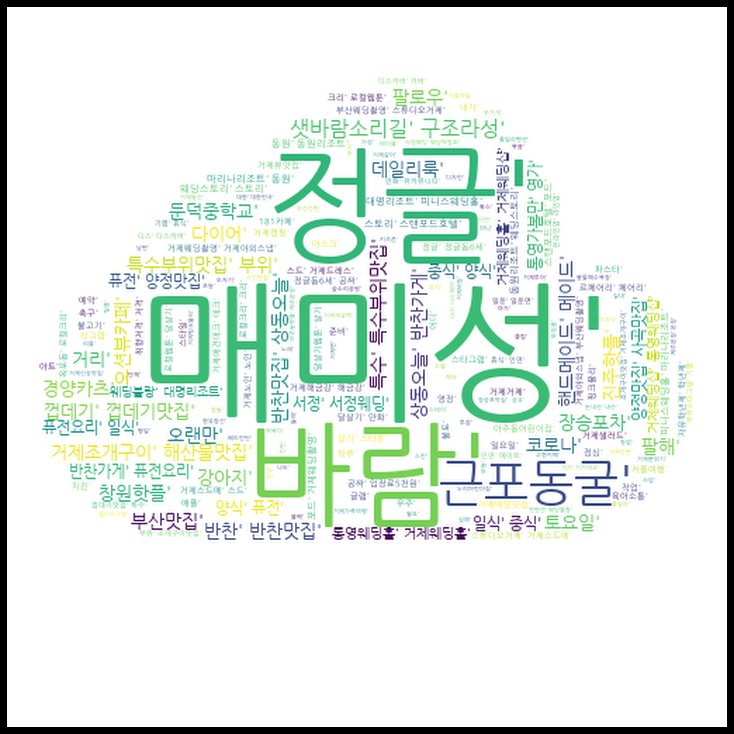

In [53]:
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

mask = np.array(Image.open('data_p/cloud.png'))
wordcloud = WordCloud(width = 500,height = 500,font_path='C:/Users/ict06/Documents/sd_python/font/NanumGothic.ttf',
                      background_color = 'white', mask=mask).generate(str(nonus_list))
fig = plt.figure(figsize = (10, 30),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'lanczos')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()